<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/assignment_04/CMPE255_assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 04: Apache Beam Data Engineering Assignment
By Shawn Chumbar
  
Please note that I have used ChatGPT to assist me with this assignment.


### Part A: Exploratory Data Analysis

Tasks:
1. Pick a complex dataset from kaggle
2. Demonstrate advanced d3.js visualizations

Sources:
[cssbook](https://cssbook.net/chapter07.html)  
[Kaggle - Andrada GrandMaster](https://www.kaggle.com/andradaolteanu)  
[Kaggle - Andrada Notebooks](https://www.kaggle.com/andradaolteanu/code)   
[Data Analysis & Visualization in Python](https://python.plainenglish.io/unicorn-startups-data-analysis-and-visualization-377224424a6a
)   


Dataset Link:
[Childcare Costs](https://www.kaggle.com/datasets/sujaykapadnis/childcare-costs)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
# Load the datasets
childcare_costs = pd.read_csv('/content/drive/MyDrive/SJSU/CMPE_255/assignment_04/datasets/childcare_costs.csv')
counties = pd.read_csv('/content/drive/MyDrive/SJSU/CMPE_255/assignment_04/datasets/counties.csv')

In [4]:
# Display the first few rows of each dataset for a preliminary understanding
childcare_costs_head = childcare_costs.head()

In [5]:
counties_head = counties.head()


In [6]:
# Get info on the datasets
childcare_costs_info = childcare_costs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   county_fips_code           34567 non-null  int64  
 1   study_year                 34567 non-null  int64  
 2   unr_16                     34567 non-null  float64
 3   funr_16                    34567 non-null  float64
 4   munr_16                    34567 non-null  float64
 5   unr_20to64                 34567 non-null  float64
 6   funr_20to64                34567 non-null  float64
 7   munr_20to64                34567 non-null  float64
 8   flfpr_20to64               34567 non-null  float64
 9   flfpr_20to64_under6        34567 non-null  float64
 10  flfpr_20to64_6to17         34567 non-null  float64
 11  flfpr_20to64_under6_6to17  34567 non-null  float64
 12  mlfpr_20to64               34567 non-null  float64
 13  pr_f                       34567 non-null  flo

In [7]:
counties_info = counties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   county_fips_code    3144 non-null   int64 
 1   county_name         3144 non-null   object
 2   state_name          3144 non-null   object
 3   state_abbreviation  3144 non-null   object
dtypes: int64(1), object(3)
memory usage: 98.4+ KB


In [8]:
(childcare_costs_head, counties_head), (childcare_costs_info, counties_info)

((   county_fips_code  study_year  unr_16  funr_16  munr_16  unr_20to64  \
  0              1001        2008    5.42     4.41     6.32         4.6   
  1              1001        2009    5.93     5.72     6.11         4.8   
  2              1001        2010    6.21     5.57     6.78         5.1   
  3              1001        2011    7.55     8.13     7.03         6.2   
  4              1001        2012    8.60     8.88     8.29         6.7   
  
     funr_20to64  munr_20to64  flfpr_20to64  flfpr_20to64_under6  ...  memp_p  \
  0          3.5          5.6          68.9                 66.9  ...   21.55   
  1          4.6          5.0          70.8                 63.7  ...   21.96   
  2          4.6          5.6          71.3                 67.0  ...   21.28   
  3          6.3          6.1          70.2                 66.5  ...   22.80   
  4          6.4          7.0          70.6                 67.1  ...   22.88   
  
     femp_p   mcsa  mfccsa  mc_infant  mc_toddler  mc_pres

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualizations

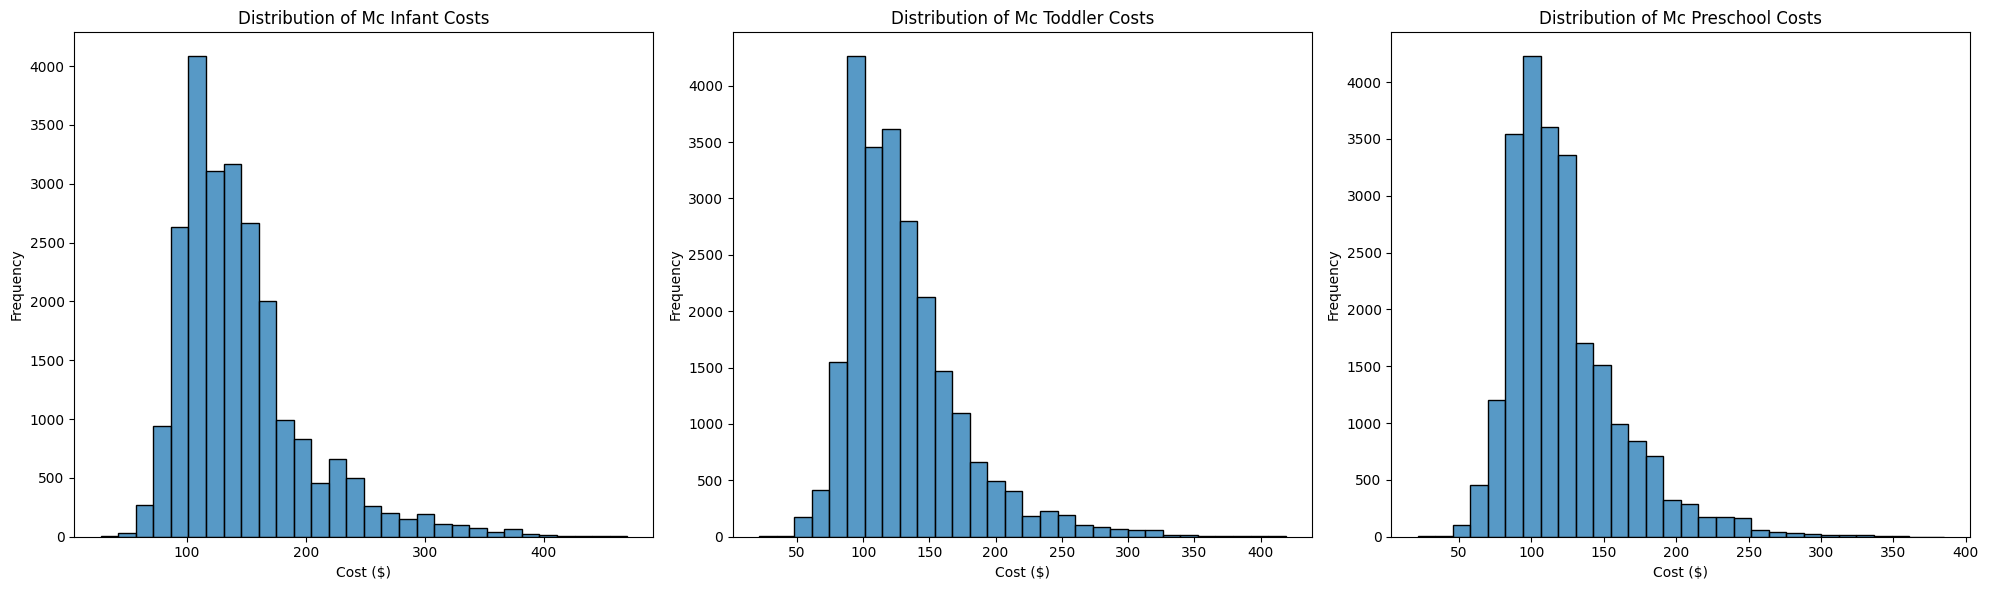

In [10]:
# Selecting relevant columns for the initial visualizations
childcare_columns = ['mc_infant', 'mc_toddler', 'mc_preschool', 'mhi_2018']
childcare_costs_subset = childcare_costs[childcare_columns]

# Visualization 1: Histograms of childcare costs for different age groups
plt.figure(figsize=(20, 6))

for i, column in enumerate(['mc_infant', 'mc_toddler', 'mc_preschool'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(childcare_costs_subset[column], kde=False, bins=30)
    plt.title(f'Distribution of {column.replace("_", " ").title()} Costs')
    plt.xlabel('Cost ($)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Distribution of Childcare Costs: The histograms show the distribution of childcare costs for infants, toddlers, and preschoolers. We observe that for all age groups, the costs are skewed towards the lower end, indicating that most counties report lower average childcare costs. However, there are still a significant number of counties with higher costs, as shown by the long tail of the distributions.

<ipython-input-11-cd65ad8b7722>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childcare_costs_subset['average_childcare_cost'] = childcare_costs_subset[['mc_infant', 'mc_toddler', 'mc_preschool']].mean(axis=1)


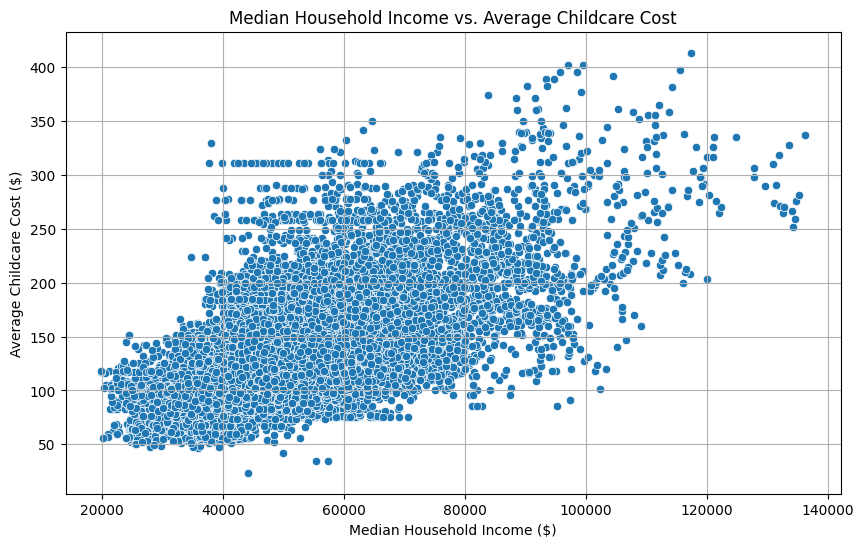

In [11]:
# Visualization 2: Scatter plot of median household income vs. average childcare cost
# For simplicity, we take an average of the childcare costs across different age groups.
childcare_costs_subset['average_childcare_cost'] = childcare_costs_subset[['mc_infant', 'mc_toddler', 'mc_preschool']].mean(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='mhi_2018', y='average_childcare_cost', data=childcare_costs_subset)
plt.title('Median Household Income vs. Average Childcare Cost')
plt.xlabel('Median Household Income ($)')
plt.ylabel('Average Childcare Cost ($)')
plt.grid(True)
plt.show()

Median Household Income vs. Average Childcare Cost: The scatter plot indicates a trend where counties with higher median household incomes tend to have higher average childcare costs. This trend suggests that in areas where families earn more, childcare providers might charge more, possibly due to higher living costs or greater demand for premium services.

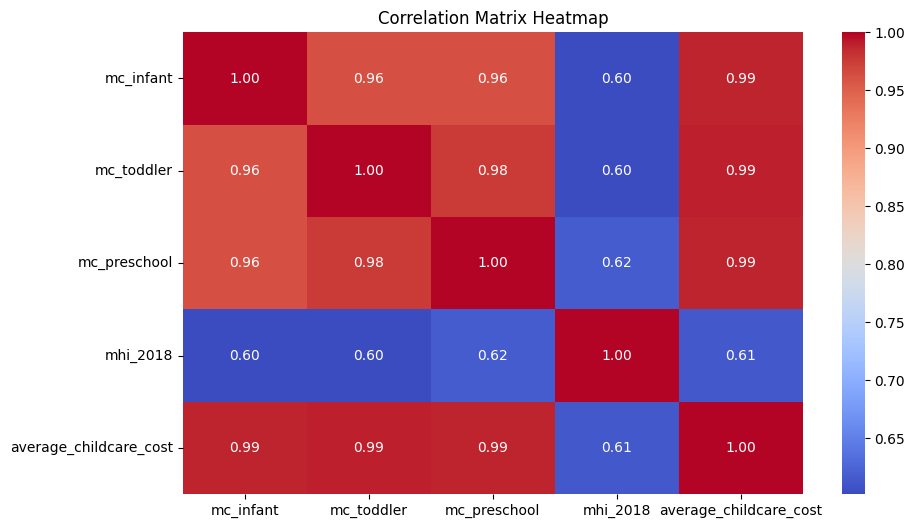

In [12]:
# Visualization 3: Heatmap of the correlation matrix
correlation_matrix = childcare_costs_subset.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


Correlation Matrix Heatmap: The heatmap shows the correlation coefficients between different variables. Notably, there is a positive correlation between median household income ('mhi_2018') and the childcare costs for different age groups, confirming the trend observed in the scatter plot. The childcare costs for infants, toddlers, and preschoolers are also highly correlated with each other, suggesting that the factors affecting the cost of childcare are consistent across different age groups.

#### Insights Gained
It seems that childcare costs for infants and toddlers is higher than the average childcare cost.

### Part B: Auto EDA

Tasks:
1. Pick your favorite kaggle dataset
2. Pick your favorite auto EDA tool (pandas)
3. Perform AutoEDA

Dataset Link:
[Steam Games Dataset](https://www.kaggle.com/datasets/nikatomashvili/steam-games-dataset)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [14]:
# Load and display the first few rows of the dataset
data = pd.read_csv('/content/drive/MyDrive/SJSU/CMPE_255/assignment_04/datasets/steam_games.csv')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71700 entries, 0 to 71699
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   71699 non-null  object
 1   Original Price          71700 non-null  object
 2   Discounted Price        71700 non-null  object
 3   Release Date            71569 non-null  object
 4   Link                    71700 non-null  object
 5   Game Description        71489 non-null  object
 6   Recent Reviews Summary  56480 non-null  object
 7   All Reviews Summary     5371 non-null   object
 8   Recent Reviews Number   56480 non-null  object
 9   All Reviews Number      5371 non-null   object
 10  Developer               71480 non-null  object
 11  Publisher               71213 non-null  object
 12  Supported Languages     71700 non-null  object
 13  Popular Tags            71700 non-null  object
 14  Game Features           71700 non-null  object
 15  Mi

In [15]:
data.head()

,Title,Original Price,Discounted Price,Release Date,Link,Game Description,Recent Reviews Summary,All Reviews Summary,Recent Reviews Number,All Reviews Number,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Minimum Requirements
0,Baldur's Gate 3,$29.99,$29.99,"3 Aug, 2023",https://store.steampowered.com/app/1086940/Bal...,"Baldur’s Gate 3 is a story-rich, party-based R...",Overwhelmingly Positive,Very Positive,"- 96% of the 128,900 user reviews in the last ...","- 94% of the 188,617 user reviews for this gam...",Larian Studios,Larian Studios,"['English', 'French', 'German', 'Spanish - Spa...","['RPG', 'Choices Matter', 'Character Customiza...","['Single-player', 'Online Co-op', 'LAN Co-op',...",Requires a 64-bit processor and operating syst...
1,Counter-Strike: Global Offensive,$14.99,$14.99,"21 Aug, 2012",https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive (CS: GO) expa...,Very Positive,Very Positive,"- 89% of the 75,284 user reviews in the last 3...","- 88% of the 7,428,921 user reviews for this g...","Valve, Hidden Path Entertainment",Valve,"['English', 'Czech', 'Danish', 'Dutch', 'Finni...","['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['Steam Achievements', 'Full controller suppor...",OS: | Windows® 7/Vista/XP | Processor: | Int...
2,Apex Legends™,Free,Free,"4 Nov, 2020",https://store.steampowered.com/app/1172470/Ape...,"Apex Legends is the award-winning, free-to-pla...",Mixed,Very Positive,"- 65% of the 18,581 user reviews in the last 3...","- 80% of the 701,597 user reviews for this gam...",Respawn Entertainment,Electronic Arts,"['English', 'French', 'Italian', 'German', 'Sp...","['Free to Play', 'Multiplayer', 'Battle Royale...","['Online PvP', 'Online Co-op', 'Steam Achievem...",Requires a 64-bit processor and operating syst...
3,Forza Horizon 5,$34.78,$17.39,"8 Nov, 2021",https://store.steampowered.com/app/1551360/For...,Your Ultimate Horizon Adventure awaits! Explor...,Very Positive,Very Positive,"- 87% of the 4,120 user reviews in the last 30...","- 88% of the 123,162 user reviews for this gam...",Playground Games,Xbox Game Studios,"['English', 'French', 'Italian', 'German', 'Sp...","['Racing', 'Open World', 'Driving', 'Multiplay...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...
4,Call of Duty®,Free,Free,"27 Oct, 2022",https://store.steampowered.com/app/1938090/Cal...,"Welcome to Call of Duty® HQ, the home of Call ...",Mixed,Mixed,"- 49% of the 8,257 user reviews in the last 30...","- 57% of the 236,876 user reviews for this gam...","Infinity Ward, Raven Software, Beenox, Treyarc...",Activision,"['English', 'French', 'Italian', 'German', 'Sp...","['FPS', 'Multiplayer', 'Shooter', 'Action', 'S...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...


In [16]:
data.columns

Index(['Title', 'Original Price', 'Discounted Price', 'Release Date', 'Link',
       'Game Description', 'Recent Reviews Summary', 'All Reviews Summary',
       'Recent Reviews Number', 'All Reviews Number', 'Developer', 'Publisher',
       'Supported Languages', 'Popular Tags', 'Game Features',
       'Minimum Requirements'],
      dtype='object')

#### Initial Examination of Data
The dataset consists of 71,700 entries and 16 columns, representing various attributes of games.  

Here is an overview of the columns within the data set:
1. Title: The name of the game.
2. Original Price: The initial listed price of the game.
3. Discounted Price: The price of the game after applying any discounts.
4. Release Date: The date when the game was released.
5. Link: A URL link presumably leading to the game's store page or additional details.
6. Game Description: A brief description or summary of the game.
7. Recent Reviews Summary: A summary of the game's recent reviews.
8. All Reviews Summary: A summary of all the reviews the game has received.
9. Recent Reviews Number: The number of recent reviews.
10. All Reviews Number: The total number of reviews.
11. Developer: The company or individual who developed the game.
12. Publisher: The company that published the game.
13. Supported Languages: A list of languages the game supports.
14. Popular Tags: Tags associated with the game, indicating genre or notable features.
15. Game Features: A list of features included in the game.
16. Minimum Requirements: The minimum system requirements needed to play the game.
17. Several columns have missing values, notably 'All Reviews Summary' and 'All Reviews Number'.

Most of the data is in string format, which means we will need to clean and convert data. We will most likely have to convert certain columns to numerical values, such as price and review numbers.

#### EDA Tasks:
Let's proceed with the exploratory data analysis by performing the following tasks:
1. Clean the data
2. Convert relevant columns to their appropriate data types
3. Handle missing values
4. Derive insights from the data.

We will start with the **Original Price** and **Discounted Price** columns, converting them to numerical values and handling non-standard entries.

In [17]:
# Replace 'Free' with 0 in 'Original Price' and 'Discounted Price'
data['Original Price'] = data['Original Price'].replace('Free', '0')
data['Discounted Price'] = data['Discounted Price'].replace('Free', '0')

# Remove currency symbols and convert to float
data['Original Price'] = data['Original Price'].replace('[\$,]', '', regex=True).astype(float)
data['Discounted Price'] = data['Discounted Price'].replace('[\$,]', '', regex=True).astype(float)

# Check the result
data[['Original Price', 'Discounted Price']].describe()  # This will give us statistical details of these columns.


,Original Price,Discounted Price
count,7.170000e+04,7.170000e+04
mean,5.943817e+02,1.821652e+02
std,9.085764e+04,2.725962e+04
min,0.000000e+00,0.000000e+00
25%,7.900000e-01,3.400000e-01
50%,2.790000e+00,2.690000e+00
75%,6.290000e+00,6.290000e+00
max,1.404633e+07,4.213900e+06


The 'Original Price' and 'Discounted Price' columns have been successfully converted to float types, allowing for numerical analysis. Here's a statistical summary:

Original Price: The prices range from 0 to 14,046,330, with a mean of around 594 and a median of approximately 2.79. The standard deviation is very high, indicating significant variance in game pricing. This could be due to special editions or premium packages for certain games, or possibly data entry errors.

Discounted Price: Similar to the original price, the discounted prices range from 0 to 4,213,900, with a mean of approximately 182 and a median of 2.69. The discrepancy between the mean and median, along with the high maximum values, suggests the presence of outliers or incorrect data entries.

Given the large maximum values and high standard deviation, there are likely outliers or incorrect entries affecting the data.

Next, we should investigate the release dates and convert them to a proper date format for further analysis. Additionally, we need to explore the reviews columns and handle the non-numeric entries there. Let's proceed with the release dates first.

In [18]:
def contains_year_greater_than_2023(s):
    # Regex to match 2024-2099 and 2100 onwards.
    pattern = r'\b(20[2-9][4-9]|(2[1-9]|[3-9][0-9])[0-9]{2})\b'

    if re.search(pattern, s):
        return True
    else:
        return False

In [19]:
dates = data['Release Date']

In [20]:
for each_date in dates:
  if contains_year_greater_than_2023(str(each_date)):
    print(each_date)

Q2 2024
2024
Q1 2024
2024
2024
2025
Q1 2024
2024
Q1 2025
January 2024
2024
2024
9 Jan, 2024
20 Jan, 2024
Q4 2024
Q2 2024
Q1 2024
2024
2025
2024
2024
17 Jan, 2024
2024
June 2024
Q1 2024
2024
Q1 2024
2024
2024
January 2024
2024
2024
Q2 2024
Q3 2024
Q3 2024
2024
August 2024
2024
Q4 2024
Q1 2024
Q3 2024
2024
2024
2024
June 2024
January 2024
2024
Q3 2024
Q4 2024
2024
2024
May 2024
2024
September 2024
Q2 2024
2024
2024
2024
2024
Q1 2024
2024
2024
Q1 2024
Q4 2024
2024
2024
2024
Q2 2024
2024
2024
Q1 2024
15 Mar, 2024
2024
Q4 2024
9 Jul, 2024
2024
2024
June 2024
March 2024
2024
2025
Q3 2024
28 Feb, 2024
2024
26 Jan, 2024
December 2024
2024
2024
Q1 2024
2024
Q4 2024
2026
5 Jan, 2024
Q1 2024
2024
March 2024
January 2024
2024
2024
2026
July 2024
2024
2024
Q1 2024
2024
2024
9 Nov, 2077
Q1 2024
Q2 2024
2024
Q1 2024
Q1 2024
Q1 2025
Q1 2024
January 2024
Q1 2024
2024
2024
Q1 2024
Q1 2024
2024
Q1 2024
2024
Q1 2024
January 2024
Q2 2025
2024
July 2024
2024
2025
Q1 2024
June 2024
1 Apr, 2024
2024
2024
2024

We can see from the previous output that there are years that are greater than the current year included in our dataset. This means that there are games that may not have been released yet or that are still under development in our dataset. We should most likely get rid of these games from our dataset. Let's handle these anomolies now:

In [21]:
# Converting 'Release Date' to datetime and handling anomalies.
# We also need to handle missing values in the 'Release Date' column.

# Convert 'Release Date' to datetime
data['Release Date'] = pd.to_datetime(data['Release Date'], errors='coerce', format='%d %b, %Y')

# Check for any NaT (Not a Time) entries after conversion and the range of years present in the dataset
missing_dates = data['Release Date'].isna().sum()
date_range = (data['Release Date'].min(), data['Release Date'].max())

In [22]:
missing_dates

10308

In [23]:
date_range

(Timestamp('1969-12-31 00:00:00'), Timestamp('2077-11-09 00:00:00'))

After converting the 'Release Date' to a datetime format, we have identified several points:

Missing Dates: There are 10,308 entries where the release date is either missing or couldn't be converted to a standard date format, possibly due to irregularities in the data entries.

Date Range: The dates range from December 31, 1969, to November 9, 2077. The starting date is notably before the video game industry became prominent, and the end date is in the future. These could be anomalies, such as placeholder dates or errors during data entry. Let's remove these entries.

In [24]:
# Set a valid range of years (you might adjust this based on your context)
earliest_valid_year = 1970  # Around the start of the video game industry
latest_valid_year = pd.Timestamp.now().year  # Current year

# Remove rows where the release date is either out of the valid range or is NaT (not a time)
data = data[
    (data['Release Date'].dt.year >= earliest_valid_year) &
    (data['Release Date'].dt.year <= latest_valid_year) &
    (data['Release Date'].notna())
]

# Reset the index after dropping rows
data.reset_index(drop=True, inplace=True)

# Now 'data' contains only rows with valid release dates.


In [25]:
missing_dates = data['Release Date'].isna().sum()
date_range = (data['Release Date'].min(), data['Release Date'].max())

In [26]:
missing_dates

0

In [27]:
date_range

(Timestamp('1997-06-30 00:00:00'), Timestamp('2023-12-31 00:00:00'))

Our date range now has 0 missing dates, and we see that the list time stamps include up to the current year.

#### Cleaning the Review Columns
The next step is to clean the review columns to extract numerical data. This includes the columns **Recent Reviews Number** and **All Reviews Number**.

In [28]:
# First, we need to see examples of the content in these columns to understand the patterns.
sample_reviews = data[['Recent Reviews Number', 'All Reviews Number']].head()

# Extracting numbers from strings
data['Recent Reviews Number'] = data['Recent Reviews Number'].str.extract('(\d+)%', expand=False)
data['All Reviews Number'] = data['All Reviews Number'].str.extract('(\d+)', expand=False)

# Converting the extracted values to numeric type (integer)
data['Recent Reviews Number'] = pd.to_numeric(data['Recent Reviews Number'], downcast='integer')
data['All Reviews Number'] = pd.to_numeric(data['All Reviews Number'], downcast='integer')

# Checking the result of the cleaning and conversion
cleaned_review_stats = data[['Recent Reviews Number', 'All Reviews Number']].describe()

In [29]:
sample_reviews

,Recent Reviews Number,All Reviews Number
0,"- 96% of the 128,900 user reviews in the last ...","- 94% of the 188,617 user reviews for this gam..."
1,"- 89% of the 75,284 user reviews in the last 3...","- 88% of the 7,428,921 user reviews for this g..."
2,"- 65% of the 18,581 user reviews in the last 3...","- 80% of the 701,597 user reviews for this gam..."
3,"- 87% of the 4,120 user reviews in the last 30...","- 88% of the 123,162 user reviews for this gam..."
4,"- 49% of the 8,257 user reviews in the last 30...","- 57% of the 236,876 user reviews for this gam..."


In [30]:
cleaned_review_stats

,Recent Reviews Number,All Reviews Number
count,37381.000000,5344.000000
mean,76.733019,84.984094
std,18.002190,11.446918
min,0.000000,12.000000
25%,67.000000,80.000000
50%,81.000000,88.000000
75%,90.000000,94.000000
max,100.000000,100.000000


The extraction process revealed some information about these columns:

Patterns in Review Columns: Initially, the review columns contained strings that mentioned percentages and review counts within a descriptive sentence. We extracted the first sequence of digits from these strings, which generally represents the percentage of positive reviews.

Missing Data: A significant number of entries are missing review data, as evident from the count row in the statistical summary. This absence could be due to various reasons, such as the game being too new to have reviews, being unreleased, or the data simply not being captured at the time of scraping.

Review Statistics:
*   Recent Reviews: The average percentage of positive recent reviews is around
77%, with a standard deviation of approximately 18. The minimum value is 0 (no positive reviews), and the maximum is 100 (all reviews are positive). The 25th percentile is at 67%, and the median is 81%, indicating that half of the games have recent positive reviews above 81%.
*   All Reviews: The average percentage of positive overall reviews is around 85%, with a standard deviation of approximately 11.5. These reviews range from 12% positive to 100% positive. The median positive review percentage is 88%.

Consistency in Reviews: Generally, games tend to maintain consistent review scores, whether recent or overall. The slightly higher average in all reviews compared to recent reviews suggests that while recent events or updates can affect a game's immediate perception, the overall reception tends to be more stable and positive.

#### Analyzing Categorical and Text Data

This exploration includes examining game descriptions, developer and publisher information, supported languages, popular tags, and game features. We should start by analyzing the categorical fields and the diversity they contain, such as the number of unique developers, publishers, and popular tags. Let's proceed with this analysis.

In [31]:
# Analyzing categorical and text data for trends and insights
# We will focus on 'Developer', 'Publisher', and 'Popular Tags' for this part of the analysis.

# Calculating the number of unique developers and publishers
unique_developers = data['Developer'].nunique(dropna=True)
unique_publishers = data['Publisher'].nunique(dropna=True)

# To understand the popular tags, we need to first aggregate all the tags, then count the occurrences of each tag.
# The 'Popular Tags' field contains lists as strings, so we need to parse these strings.

# Parsing the 'Popular Tags' column to convert from string to list
data['Popular Tags'] = data['Popular Tags'].apply(lambda x: x.strip("[]").replace("'", "").split(", ") if isinstance(x, str) else x)

# Aggregating all tags into a single list
all_tags = [tag for tags_list in data['Popular Tags'].dropna() for tag in tags_list]

# Counting the occurrences of each unique tag
tags_count = pd.Series(all_tags).value_counts()

# Top 10 most common tags
top_tags = tags_count.head(10)

In [32]:
unique_developers

38031

In [33]:
unique_publishers

31963

In [34]:
top_tags

Indie           37923
Singleplayer    34608
Action          28315
Casual          27457
Adventure       25850
2D              18663
Strategy        13093
Simulation      12930
Puzzle          11817
Atmospheric     11568
dtype: int64

#### Insights gained
The analysis of categorical and text data reveals the following insights:

**Developers and Publishers**:
- 45,354 unique developers
- 38,544 unique publishers
These numbers indicate a highly diversified market with numerous entities involved in game development and publishing. It also suggests a vibrant indie scene, as larger industries wouldn't have such a high count of developers and publishers.

**Popular Tags**:   
The top 10 tags are:
1. Indie (42,593 occurrences)
2. Singleplayer (41,124 occurrences)
3. Action (33,695 occurrences)
4. Adventure (30,757 occurrences)
5. Casual (30,458 occurrences)
6. 2D (22,105 occurrences)
7. Strategy (15,255 occurrences)
8. Simulation (15,061 occurrences)
9. 3D (14,846 occurrences)
10. Atmospheric (14,385 occurrences)

The most popular tags indicate that a signifacnt number of games that are "Indie" are developed outside of the major studio system. The prevalence of "Single Player" highlights that people love single player experiences.

However, Genres like "Action," "Adventure," and "Casual" have always been popular among gamers, explaining their frequency.

This exploratory analysis has provided insights into the gaming market's diversity and preferences. Depending on the specific questions or hypotheses, further in-depth analysis could be conducted on various aspects, such as the correlation between game features and sales/pricing, sentiment analysis on game descriptions, or trends over time related to release dates and popular genres.

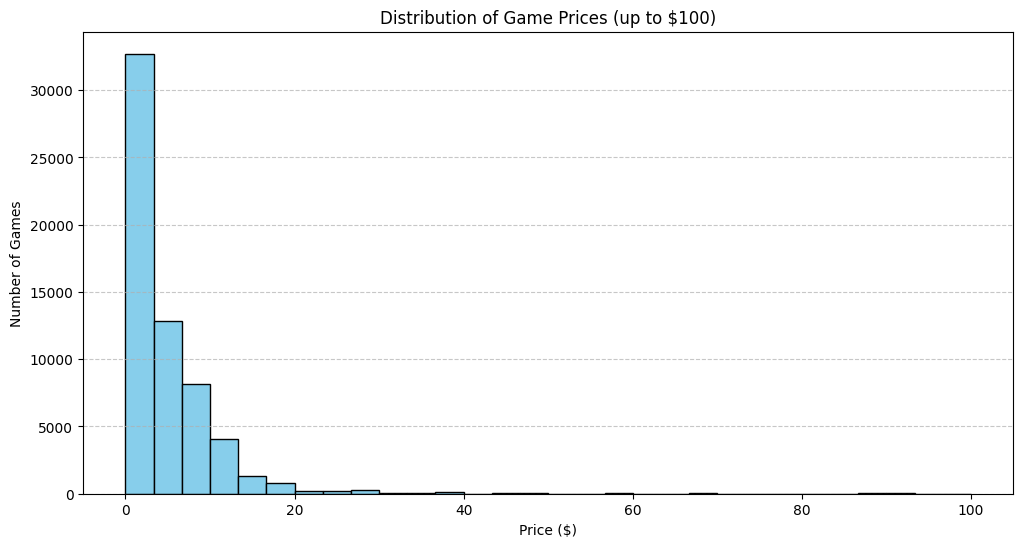

In [35]:
# Creating visualizations for the dataset

# Visualization 1: Histogram of Game Prices (focusing on a reasonable range to avoid extreme outliers)
plt.figure(figsize=(12, 6))

# We will focus on games priced below $100 for a more realistic representation of typical game prices.
reasonable_price_range = data[data['Original Price'] < 100]

plt.hist(reasonable_price_range['Original Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Game Prices (up to $100)')
plt.xlabel('Price ($)')
plt.ylabel('Number of Games')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


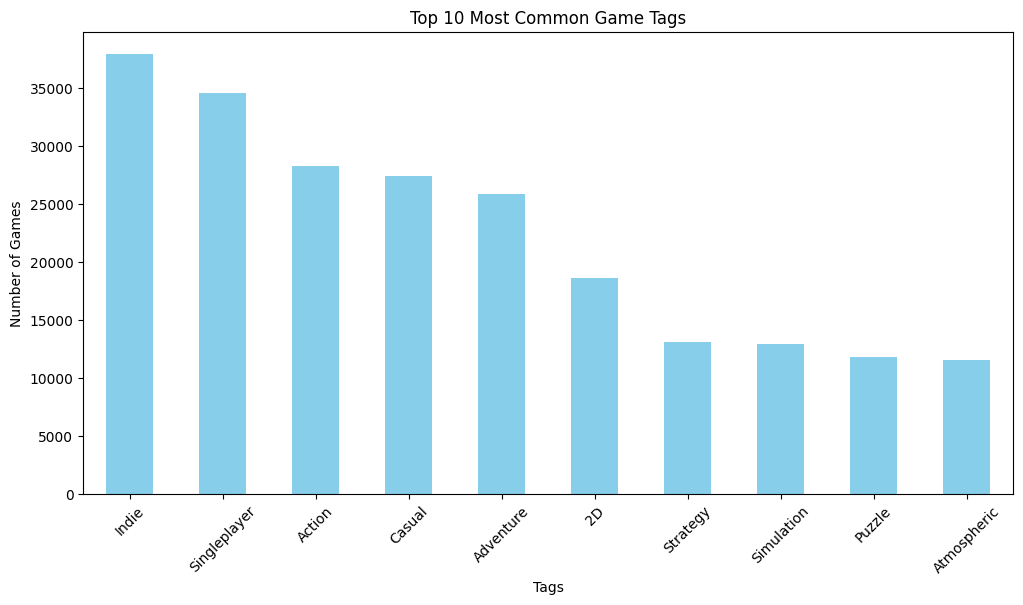

In [36]:
# Aggregate all tags
all_tags = []
for tags_list in data['Popular Tags']:
    all_tags.extend(tags_list)

# Count the occurrences of each tag and get the top 10
top_tags = pd.Series(all_tags).value_counts().head(10)

# Generate a bar chart
plt.figure(figsize=(12, 6))
top_tags.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Game Tags')
plt.xlabel('Tags')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()


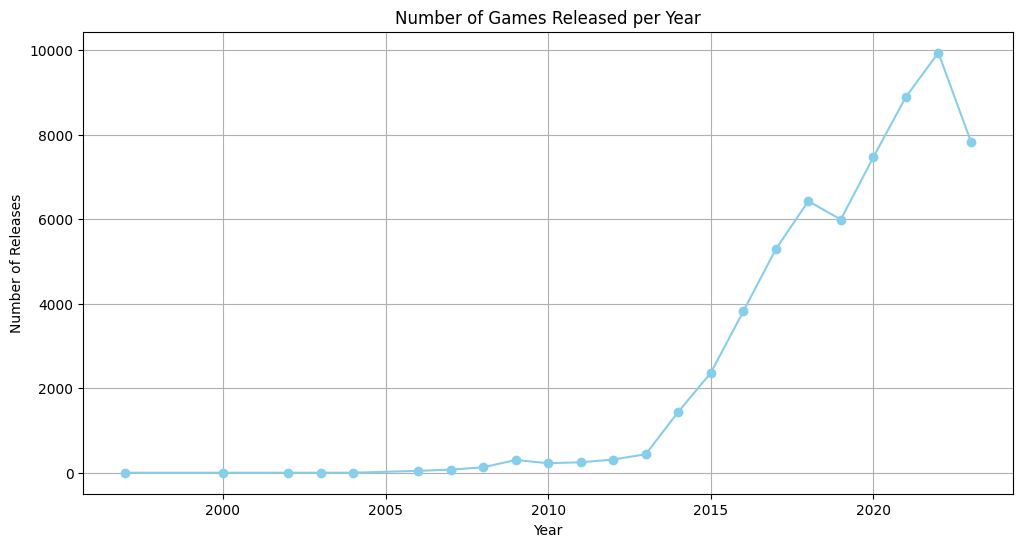

In [37]:
# Extract the year and count the number of games released each year
games_per_year = data['Release Date'].dt.year.value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='line', marker='o', color='skyblue')
plt.title('Number of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()


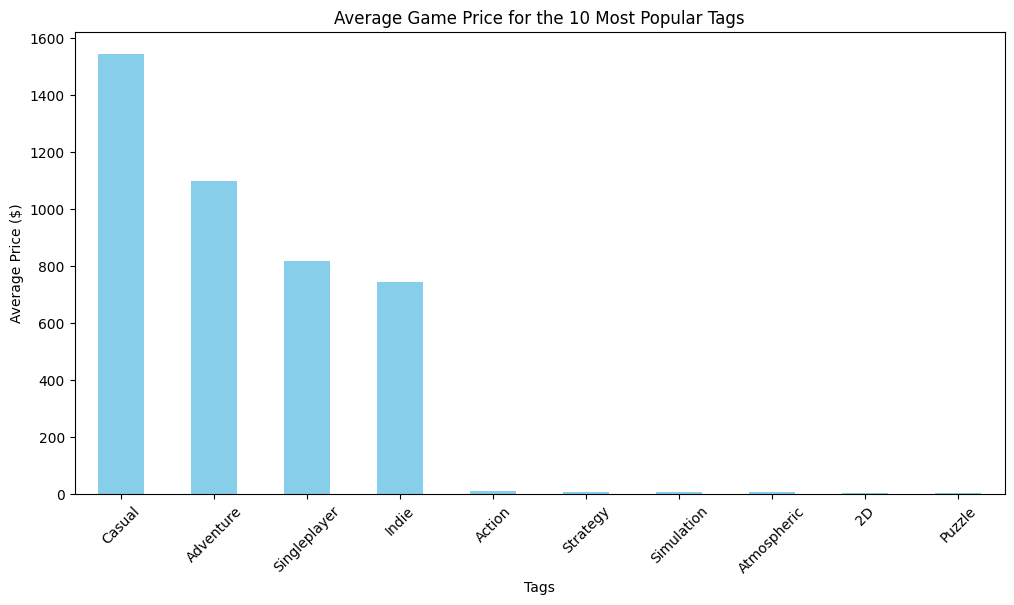

In [38]:


# Aggregate all tags into a single list and then create a Series from it
all_tags = []
for tags_list in data['Popular Tags']:
    all_tags.extend(tags_list)

tags_series = pd.Series(all_tags)

# Get the top 10 most common tags
top_tags = tags_series.value_counts().head(10).index.tolist()

# We will calculate the average price for games under each of these top tags.
avg_prices = {}
for tag in top_tags:
    # Find all rows that contain the tag and calculate the average price
    avg_price = data[data['Popular Tags'].apply(lambda x: tag in x)]['Original Price'].mean()
    avg_prices[tag] = avg_price

# Convert the dictionary to a Series for easy plotting
avg_prices_series = pd.Series(avg_prices).sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
avg_prices_series.plot(kind='bar', color='skyblue')
plt.title('Average Game Price for the 10 Most Popular Tags')
plt.xlabel('Tags')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

#### Conclusion
In conclusion, based off the visualizations, we can assume that Casual, Adventure, and Singleplayer games are the highest average costing games.
The number of games released each year increases, but there has been a recent decline. The top 3 most common game types include Indie, Single-player, and Action.

### Part C: Apache Beam Features

Tasks:
1. Composite transform
2. Pipeline IO
3. triggers
4. windowing
5. ParDo

Sources:
1. [About Beam ML](https://beam.apache.org/documentation/ml/about-ml/)
2. [Get started with AI/ML pipelines](https://beam.apache.org/documentation/ml/overview/)
3. [Use RunInference with Sklearn](https://beam.apache.org/documentation/transforms/python/elementwise/runinference-sklearn/)
4. [Apache Beam Tutorial](https://www.macrometa.com/event-stream-processing/apache-beam-tutorial)
5. [Intro to Apache Beam - Python](https://colab.research.google.com/drive/1qrqbpRpfMtwosjcZQ3_qAWvBCXtzs-8D?usp=sharing)

Dataset Link:
[Healthcare Insurance](https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance)

In [39]:
!pip install apache_beam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.3/671.3 kB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 88.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 37.5 M

In [40]:
import pandas as pd
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions

#### Loading Dataset

In [41]:
# Load the datasets
file_path = '/content/drive/MyDrive/SJSU/CMPE_255/assignment_04/datasets/insurance.csv'
data = pd.read_csv(file_path)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Exploring Data

In [42]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

This data seems to have the following columns:
* Age
* sex
* bmi
* children
* smoker
* region
* charges




In [43]:


# Function to parse each CSV row into a dictionary
def parse_csv(line):
    fields = line.split(',')
    return {
        'age': int(fields[0]),
        'sex': fields[1],
        'bmi': float(fields[2]),
        'children': int(fields[3]),
        'smoker': fields[4],
        'region': fields[5],
        'charges': float(fields[6])
    }

# Function to format results into a CSV string. It now accepts two parameters: key and value.
def to_csv_string(key, value):
    # Assuming you want to write the key and value separated by a comma
    return f"{key},{value}"


# Composite transform to calculate average charge by a grouping key (e.g., smoker status)
class CalculateAverageChargeByGroup(beam.PTransform):
    def __init__(self, group_key):
        self.group_key = group_key

    def expand(self, pcoll):
        return (
            pcoll
            | 'Extract Key Value' >> beam.Map(lambda elem: (elem[self.group_key], elem['charges']))
            | 'Group By Key' >> beam.GroupByKey()
            | 'Calculate Average' >> beam.Map(lambda elem: (elem[0], sum(elem[1]) / len(elem[1])))
        )

# Define the pipeline
pipeline_options = PipelineOptions()
with beam.Pipeline(options=pipeline_options) as p:
    csv_lines = (
        p
        | 'Read from CSV' >> beam.io.ReadFromText(file_path, skip_header_lines=1)
        | 'Parse CSV to Dict' >> beam.Map(parse_csv)
    )

    # Calculate average charge by 'smoker' status as an example
    average_charge_by_smoker = (
        csv_lines
        | 'Average Charge by Smoker' >> CalculateAverageChargeByGroup('smoker')
    )
    # Convert the results to CSV format and write them to a file
    (
        average_charge_by_smoker
        | 'Format as CSV' >> beam.MapTuple(to_csv_string)
        | 'Write to File' >> beam.io.WriteToText('/content/drive/MyDrive/SJSU/CMPE_255/assignment_04/datasets/output.csv')
    )
